In [17]:
# Import 3rd party libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import re

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

In [18]:
# Read in the three weather data files from 1-Raw_data
# Note that the second row contains the header names in the csv files

weather_data_2019 =  pd.read_csv(r"C:\Users\user\PycharmProjects\CIV1498Project2\0-Raw_data\weather_data_2019.csv", header=[1])
weather_data_2020 =  pd.read_csv(r"C:\Users\user\PycharmProjects\CIV1498Project2\0-Raw_data\weather_data_2020.csv", header=[1])
weather_data_2021 =  pd.read_csv(r"C:\Users\user\PycharmProjects\CIV1498Project2\0-Raw_data\weather_data_2021.csv", header=[1])

# View head and tail of weather data file
print(weather_data_2021.head(10))
print(weather_data_2021.tail(10))

         Date      Time TEMP_MEAN WDIR_VECT WDIR_UVEC WSPD_SCLR HUMIDITY
0         NaN       NaN        °C      Deg.      Deg.       m/s     % RH
1  12/31/2020  24:00 AM      -5.3     290.3     304.5       1.3     77.5
2    1/1/2021   1:00 AM        -7     302.1     317.8       0.9     83.7
3    1/1/2021   2:00 AM      -8.8     286.8     301.3       0.6     87.7
4    1/1/2021   3:00 AM      -9.2      57.9      15.7       0.5     89.1
5    1/1/2021   4:00 AM      -8.3       283     285.5       0.9     87.6
6    1/1/2021   5:00 AM      -7.4     107.4     104.1         1     87.5
7    1/1/2021   6:00 AM      -6.9      82.2      79.4       1.1     89.9
8    1/1/2021   7:00 AM      -6.1      76.2      75.5       1.4     91.9
9    1/1/2021   8:00 AM      -5.9        72      72.5       1.1     92.2
          Date      Time        TEMP_MEAN        WDIR_VECT        WDIR_UVEC  \
8783  1/1/2022  10:00 PM            -18.5            344.1            349.6   
8784  1/1/2022  11:00 PM            -21

In [19]:


def clean_weather_data(df):
    # explain what function does ***

    # Rename columns to include unit of measurement
    df.rename(columns={'TEMP_MEAN':'TEMP_MEAN_(C)', 'WDIR_VECT':'WDIR_VECT_(DEG)', 'WDIR_UVEC':'WDIR_UVEC_(DEG)', 'WSPD_SCLR':'WSPD_SCLR(M/S)', 'HUMIDITY':'HUMIDITY_(%)'}, inplace=True)

    # Drop the first row and the last eight statistical summary rows
    df = df[1:-8]

    # Define datatypes
    df['Date'] = df['Date'].astype(str)
    df['Time'] = df['Time'].astype(str)
    df[['TEMP_MEAN_(C)', 'WDIR_VECT_(DEG)', 'WDIR_UVEC_(DEG)', 'WSPD_SCLR(M/S)',
        'HUMIDITY_(%)']] = df[['TEMP_MEAN_(C)', 'WDIR_VECT_(DEG)', 'WDIR_UVEC_(DEG)', 'WSPD_SCLR(M/S)', 'HUMIDITY_(%)']].astype(float)

    # Turn data and time columns into a DateTimeIndex
    format = '%m/%d/%Y %I:%M %p'
    df['Date'] = df[['Date', 'Time']].agg(' '.join, axis =1)
    df['Date'] = df['Date'].str.replace('24:00', '12:00')
    df['Datetime'] = pd.to_datetime(df['Date'].astype("string"), format=format)
    df = df.set_index(pd.DatetimeIndex(df['Datetime']))
    df.drop(['Date', 'Time', 'Datetime'], axis=1, inplace=True)

    return df

In [20]:
# Run weather dataframes through function to clean
weather_data_2019 = clean_weather_data(weather_data_2019)
weather_data_2020 = clean_weather_data(weather_data_2020)
weather_data_2021 = clean_weather_data(weather_data_2021)

# View data frame
weather_data_2021.head()

,TEMP_MEAN_(C),WDIR_VECT_(DEG),WDIR_UVEC_(DEG),WSPD_SCLR(M/S),HUMIDITY_(%)
Datetime,,,,,
2020-12-31 00:00:00,-5.3,290.3,304.5,1.3,77.5
2021-01-01 01:00:00,-7.0,302.1,317.8,0.9,83.7
2021-01-01 02:00:00,-8.8,286.8,301.3,0.6,87.7
2021-01-01 03:00:00,-9.2,57.9,15.7,0.5,89.1
2021-01-01 04:00:00,-8.3,283.0,285.5,0.9,87.6


In [21]:
# Combine all dataframe into one dataframe
weather_data = pd.concat([weather_data_2019, weather_data_2020, weather_data_2021], axis=0)

# view dataframe
weather_data.head()

,TEMP_MEAN_(C),WDIR_VECT_(DEG),WDIR_UVEC_(DEG),WSPD_SCLR(M/S),HUMIDITY_(%)
Datetime,,,,,
2018-12-31 00:00:00,0.5,267.5,267.6,13.3,70.7
2019-01-01 01:00:00,0.8,272.7,273.2,10.0,67.1
2019-01-01 02:00:00,0.8,274.6,275.0,8.8,66.8
2019-01-01 03:00:00,1.2,274.9,274.8,8.4,66.0
2019-01-01 04:00:00,0.7,268.3,268.6,7.7,68.6


In [24]:
# Assess the dataframe for any missing values
print(len(weather_data))
weather_data.isnull().sum()

26376


TEMP_MEAN_(C)      59
WDIR_VECT_(DEG)    84
WDIR_UVEC_(DEG)    84
WSPD_SCLR(M/S)     84
HUMIDITY_(%)       55
dtype: int64

Text(0, 0.5, 'Degrees (C)')

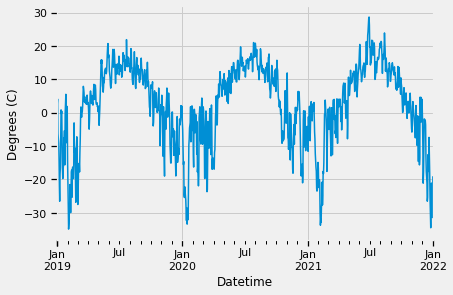

In [27]:
weather_data_daily = weather_data.resample('D').mean()

weather_data_daily['TEMP_MEAN_(C)'].plot.line()
plt.ylabel('Degrees (C)')

Text(0, 0.5, 'Windspeed (m/s)')

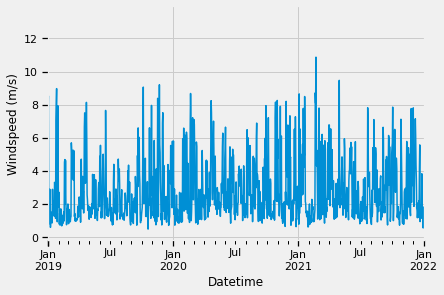

In [28]:
weather_data_daily['WSPD_SCLR(M/S)'].plot.line()
plt.ylabel('Windspeed (m/s)')